In [1]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
from scipy.cluster.hierarchy import dendrogram
import networkx as nx
import ujson


## Clustering with collaboration distance

In [2]:
df = pd.read_csv("collaboration_distances.csv")
faculties = list(df.columns)
faculties.pop(0)
df

,Unnamed: 0,Kevin Ford,Jeremy Tyson,Anil Hirani,Sheldon Katz H.,Pierre Albin,Nathan M. Dunfield,Alexandr Kostochka,Rinat Kedem,Renming Song,...,Timur Oikhberg,Felix Leditzky,Kay Kirkpatrick,Xiaochen Jing,Nikolaos Tzirakis,Ely Kerman,Philippe Di Francesco,Richard S. Laugesen,Jeremiah Heller,Rosemary Guzman
0,Kevin Ford,0.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,...,2.0,4.0,3.0,5.0,3.0,4.0,3.0,3.0,4.0,5.0
1,Jeremy Tyson,3.0,0.0,4.0,3.0,4.0,4.0,3.0,4.0,2.0,...,4.0,5.0,3.0,5.0,2.0,3.0,4.0,3.0,5.0,5.0
2,Anil Hirani,4.0,4.0,0.0,4.0,4.0,1.0,3.0,4.0,4.0,...,5.0,5.0,4.0,6.0,2.0,5.0,5.0,4.0,6.0,4.0
3,Sheldon Katz H.,4.0,3.0,4.0,0.0,4.0,3.0,4.0,4.0,4.0,...,4.0,3.0,4.0,6.0,4.0,4.0,3.0,4.0,4.0,4.0
4,Pierre Albin,4.0,4.0,4.0,4.0,0.0,4.0,4.0,4.0,4.0,...,4.0,4.0,2.0,6.0,2.0,4.0,4.0,3.0,5.0,5.0
5,Nathan M. Dunfield,4.0,4.0,1.0,3.0,4.0,0.0,4.0,3.0,5.0,...,4.0,4.0,4.0,6.0,3.0,4.0,4.0,4.0,5.0,3.0
6,Alexandr Kostochka,3.0,3.0,3.0,4.0,4.0,4.0,0.0,3.0,4.0,...,4.0,4.0,4.0,5.0,4.0,2.0,3.0,3.0,4.0,5.0
7,Rinat Kedem,4.0,4.0,4.0,4.0,4.0,3.0,3.0,0.0,5.0,...,5.0,4.0,4.0,6.0,5.0,2.0,1.0,5.0,5.0,6.0
8,Renming Song,4.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,0.0,...,3.0,4.0,3.0,4.0,4.0,5.0,4.0,3.0,6.0,6.0
9,Christopher Dodd,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,...,5.0,5.0,4.0,6.0,4.0,5.0,4.0,4.0,5.0,6.0


In [7]:
r = 1        # Adjust distance matric
distance_mat = df[faculties].to_numpy() ** r
distance_mat

array([[0., 3., 4., ..., 3., 4., 5.],
       [3., 0., 4., ..., 3., 5., 5.],
       [4., 4., 0., ..., 4., 6., 4.],
       ...,
       [3., 3., 4., ..., 0., 5., 6.],
       [4., 5., 6., ..., 5., 0., 5.],
       [5., 5., 4., ..., 6., 5., 0.]])

### Dendrograms of Different Linkages

In [47]:
truncate_level = -1        # Draw dendrogram with at most "truncate_level" levels. (-1 to show the complete dendrogram)
kwarg = {"truncate_mode": "level", "p": truncate_level, "orientation": "right", "labels": faculties}

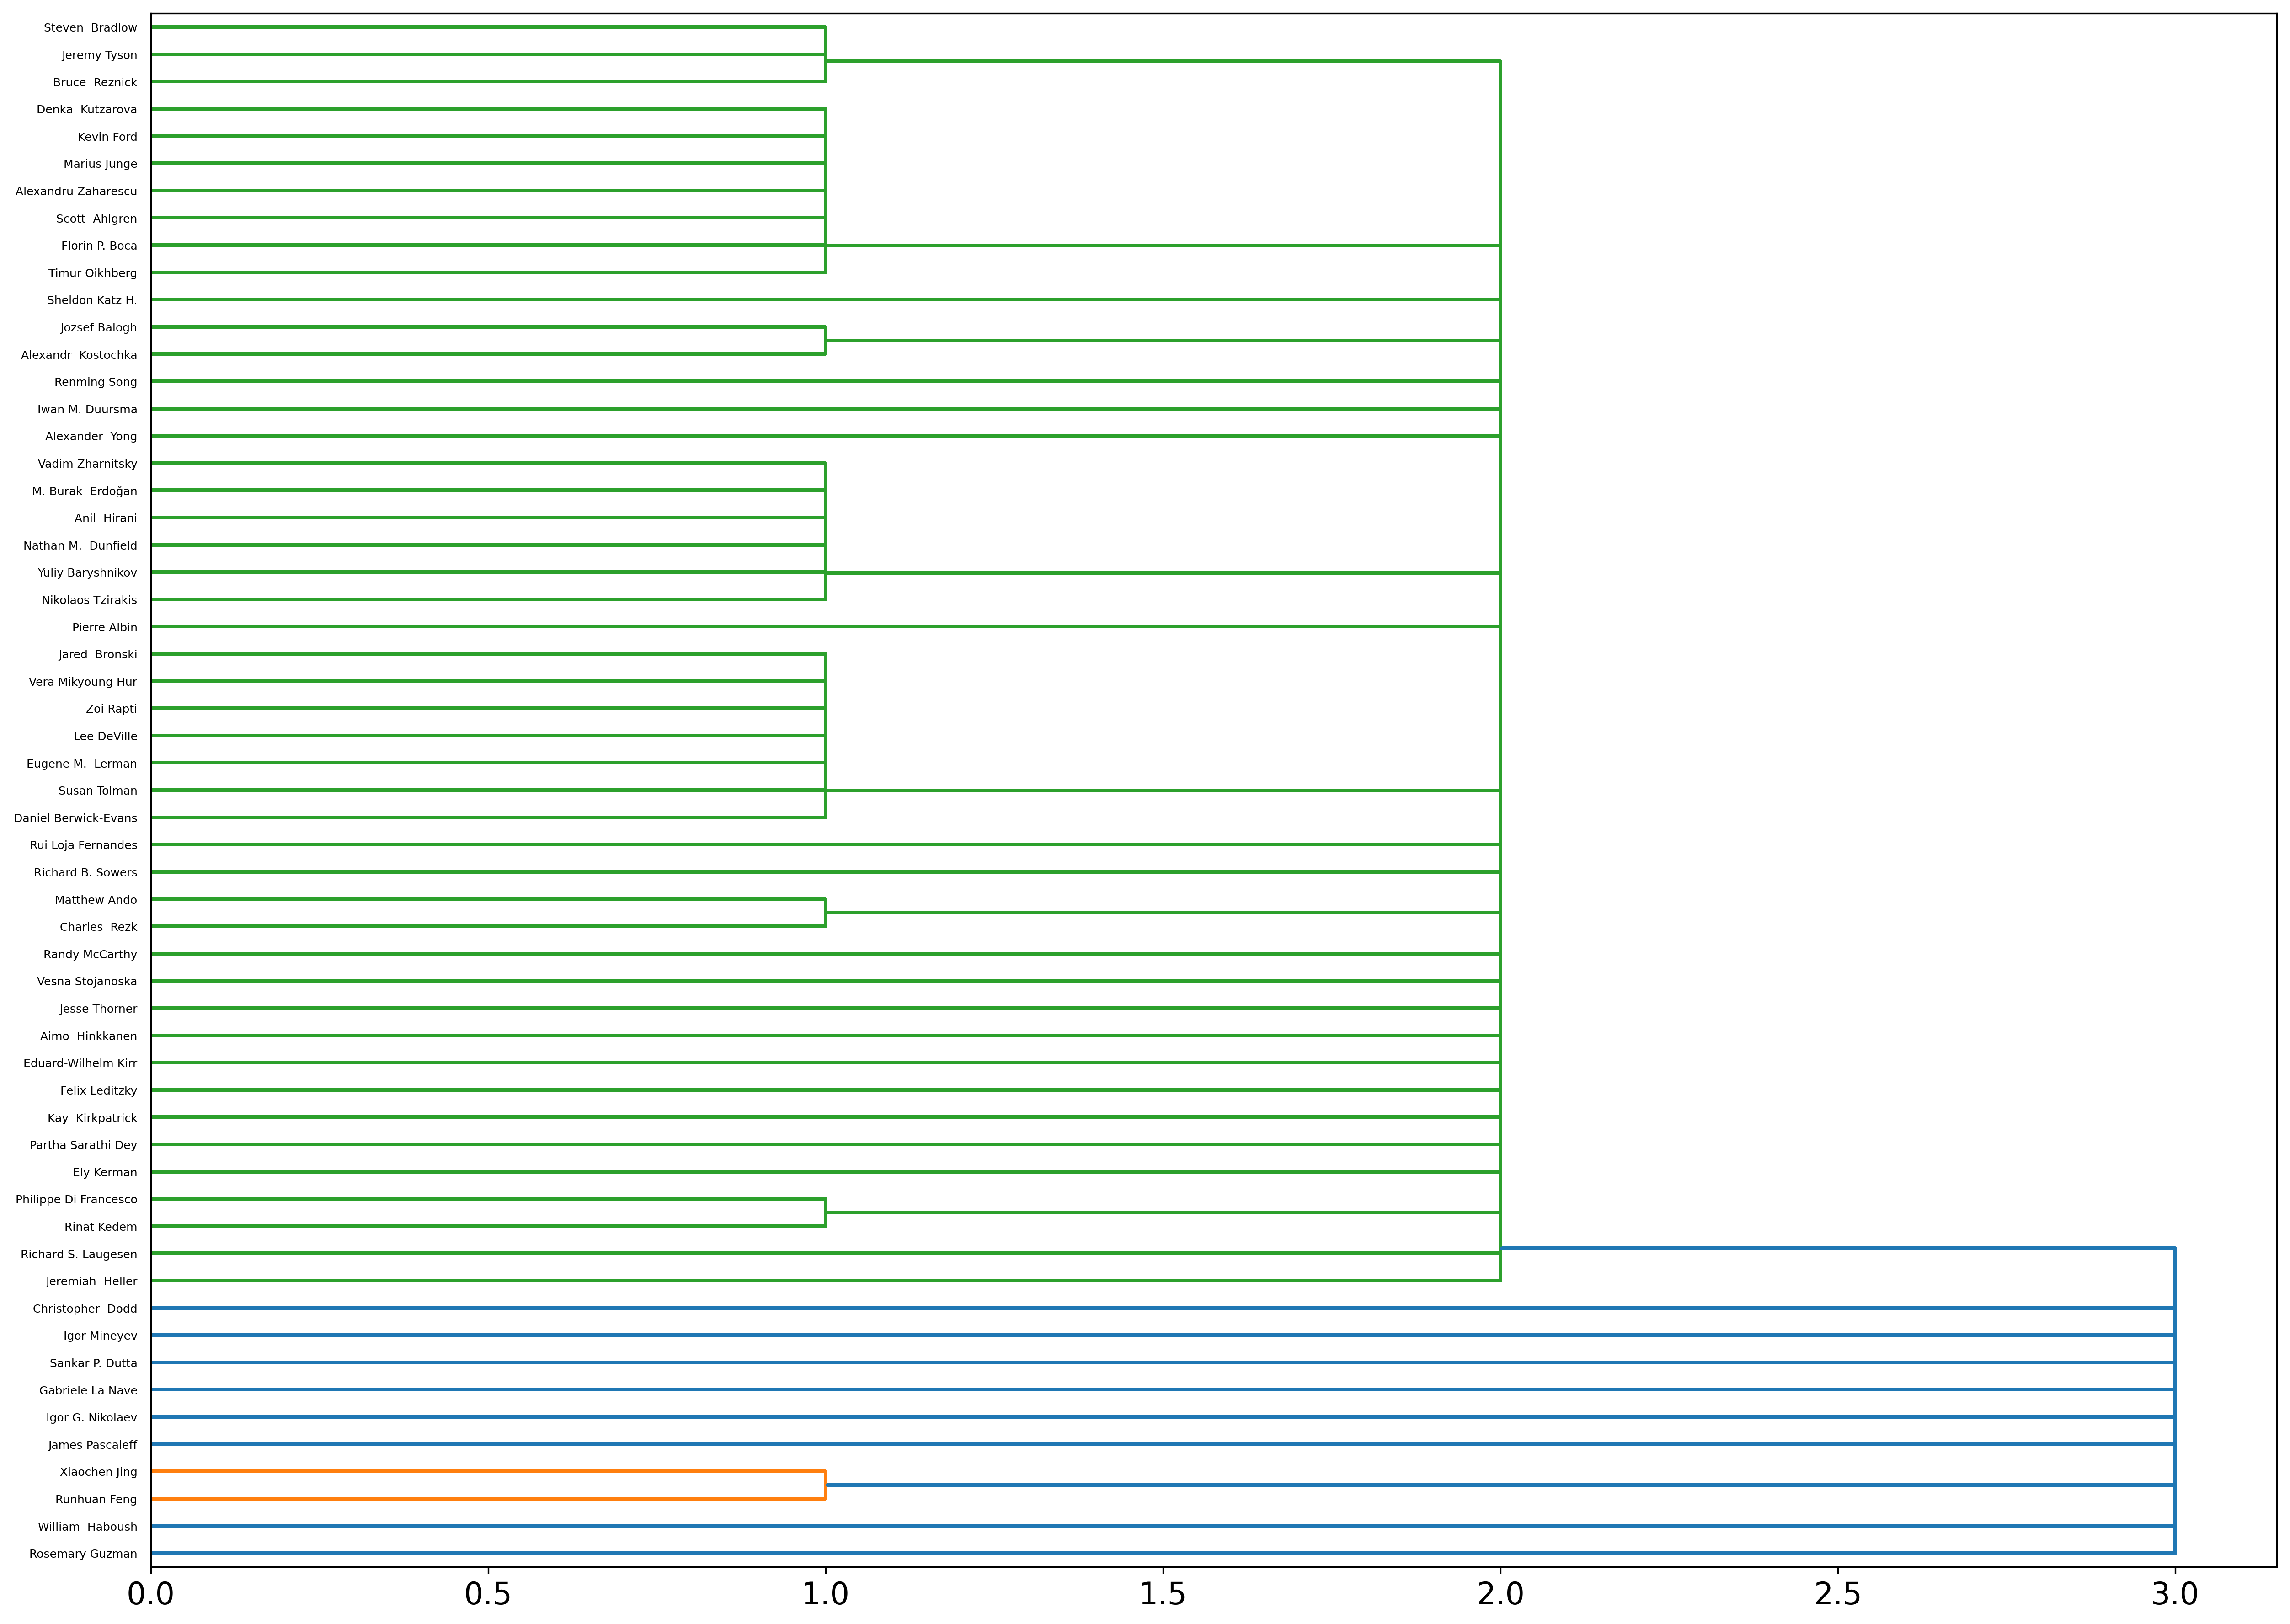

In [48]:
# Single
cl = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='precomputed',
                             compute_full_tree=True, linkage='single', compute_distances=True)
cl.fit(distance_mat)
n_samples = len(cl.labels_)
counts = np.zeros(cl.children_.shape[0])
plt.figure(figsize=(20, 15), dpi=300)
for i, merge in enumerate(cl.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

    linkage_matrix = np.column_stack(
        [cl.children_, cl.distances_, counts]
    ).astype(float)
    dendrogram(linkage_matrix, **kwarg)
    pass



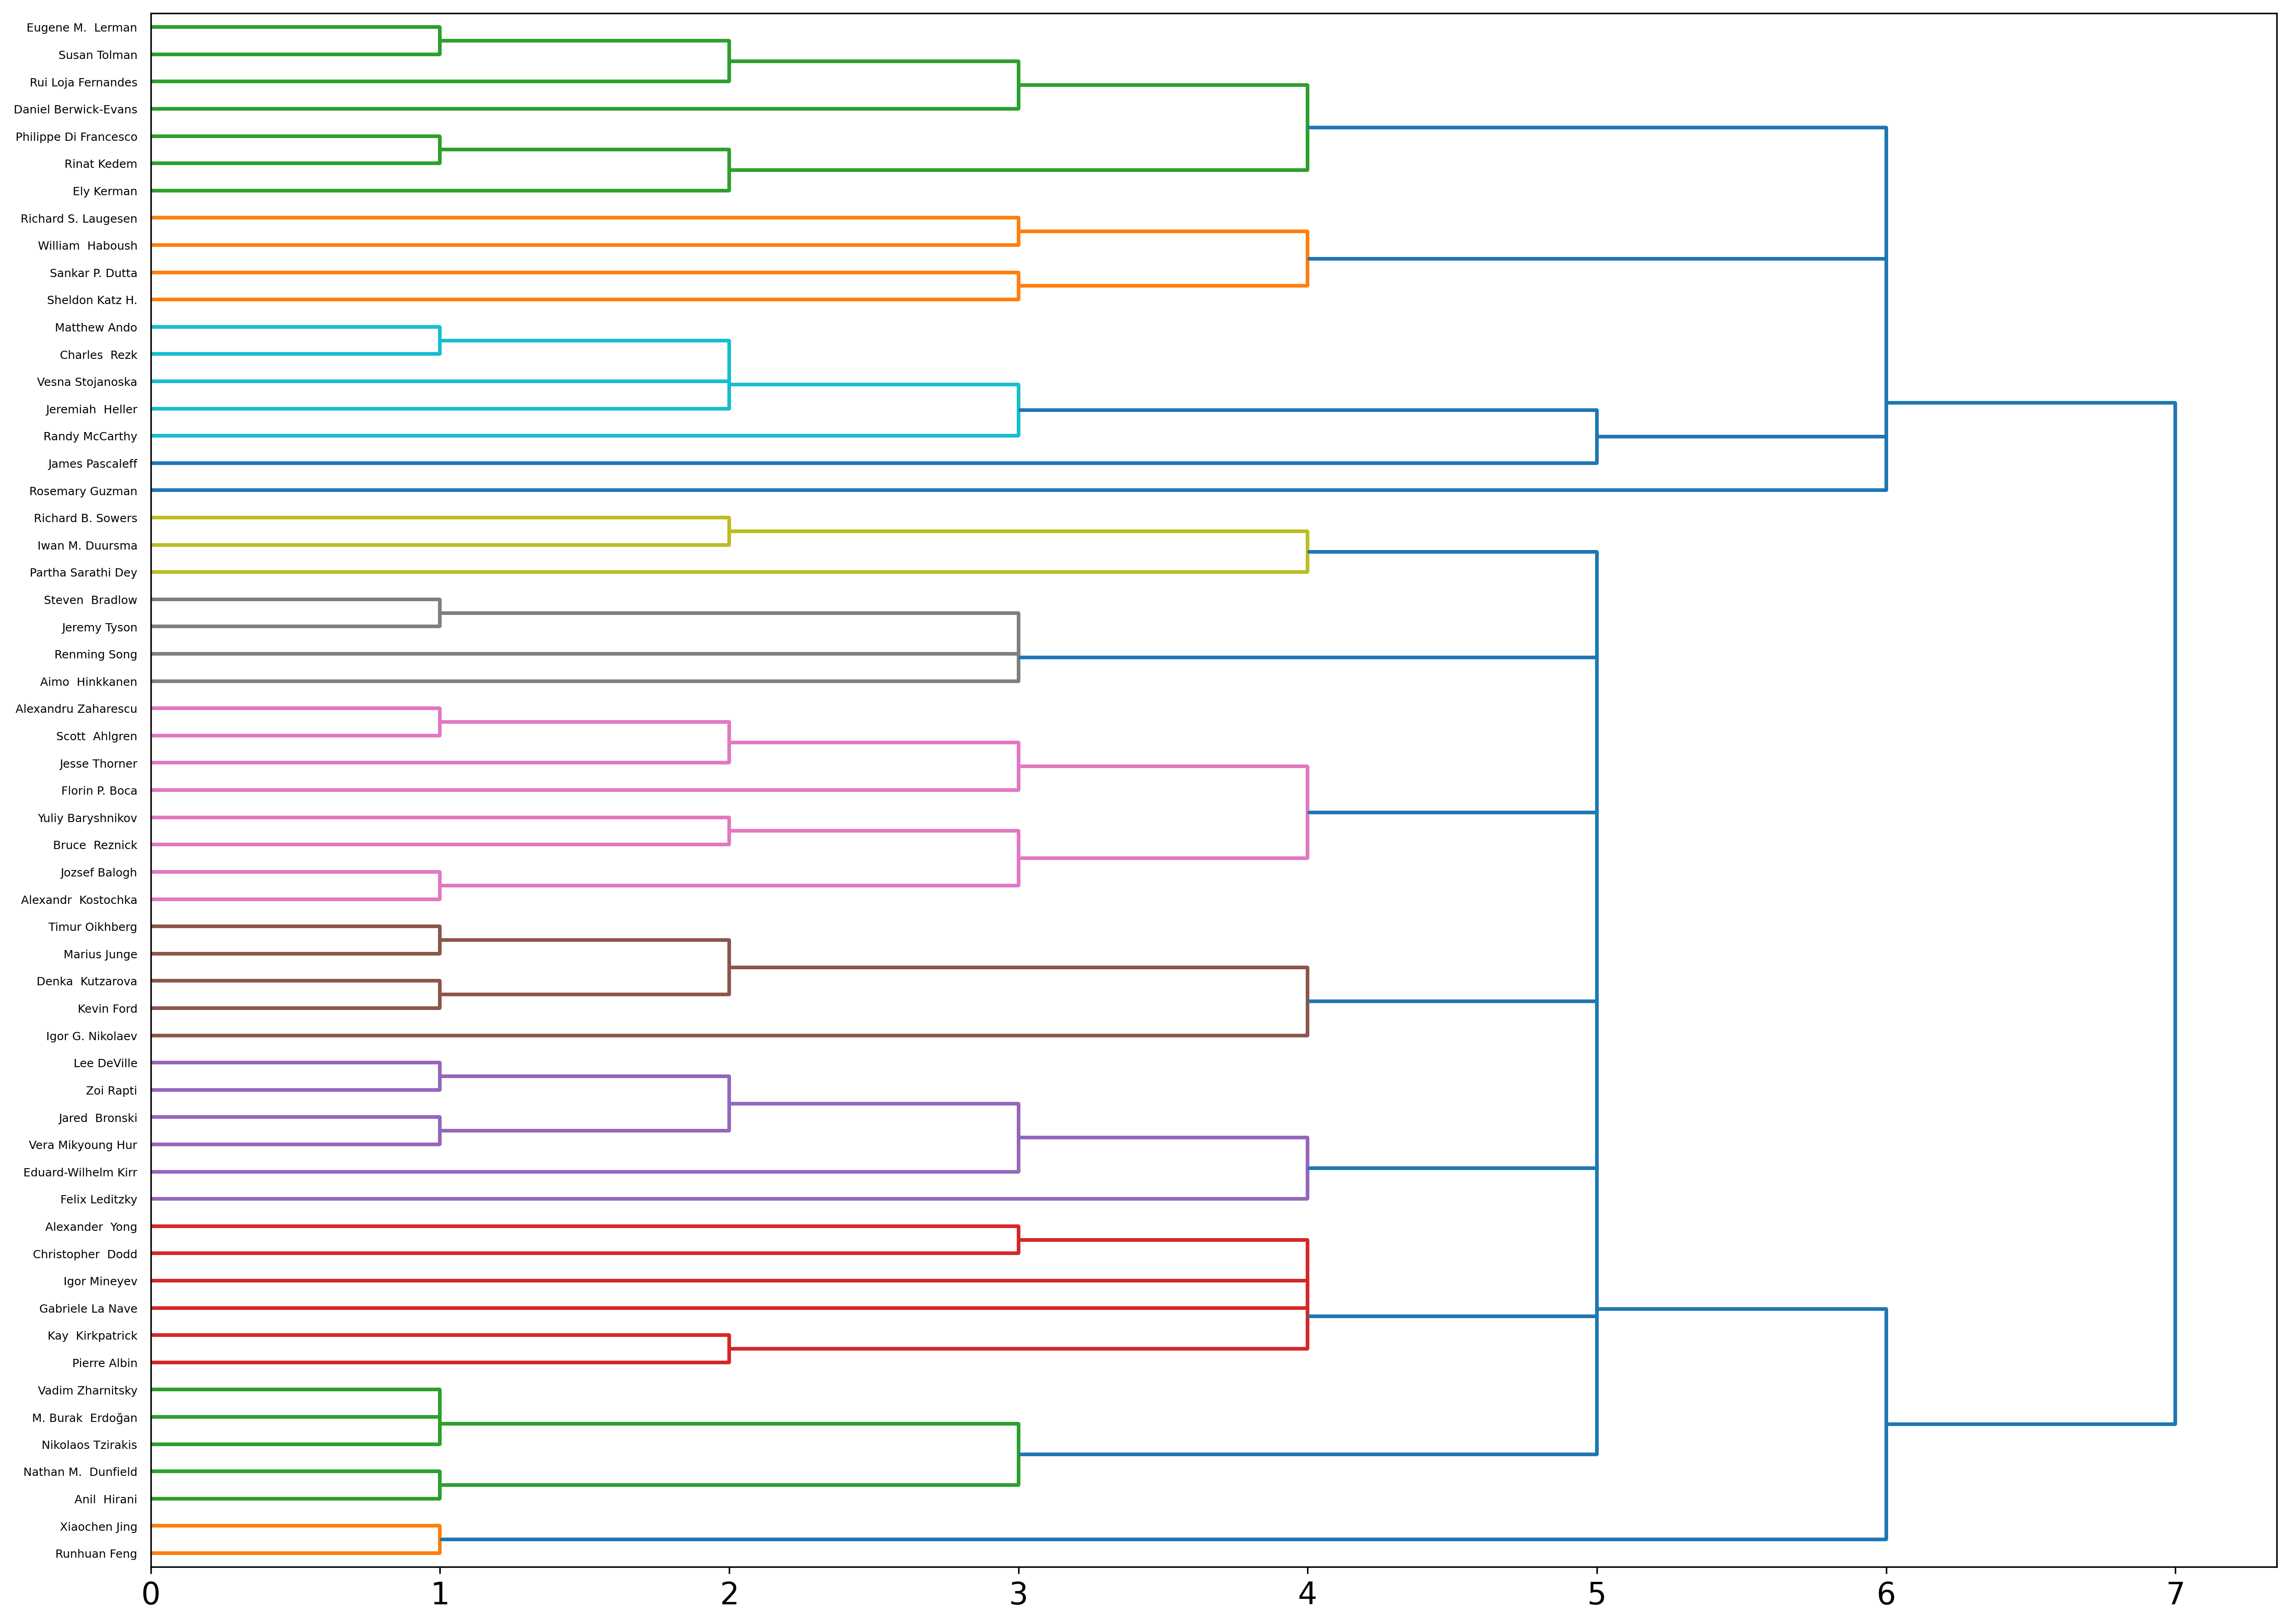

In [43]:
# Complete
cl = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='precomputed',
                             compute_full_tree=True, linkage='complete', compute_distances=True)
cl.fit(distance_mat)
n_samples = len(cl.labels_)
counts = np.zeros(cl.children_.shape[0])
plt.figure(figsize=(20, 15), dpi=300)
for i, merge in enumerate(cl.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

    linkage_matrix = np.column_stack(
        [cl.children_, cl.distances_, counts]
    ).astype(float)
    dendrogram(linkage_matrix, **kwarg)
    pass
plt.savefig("single_linkage.png")

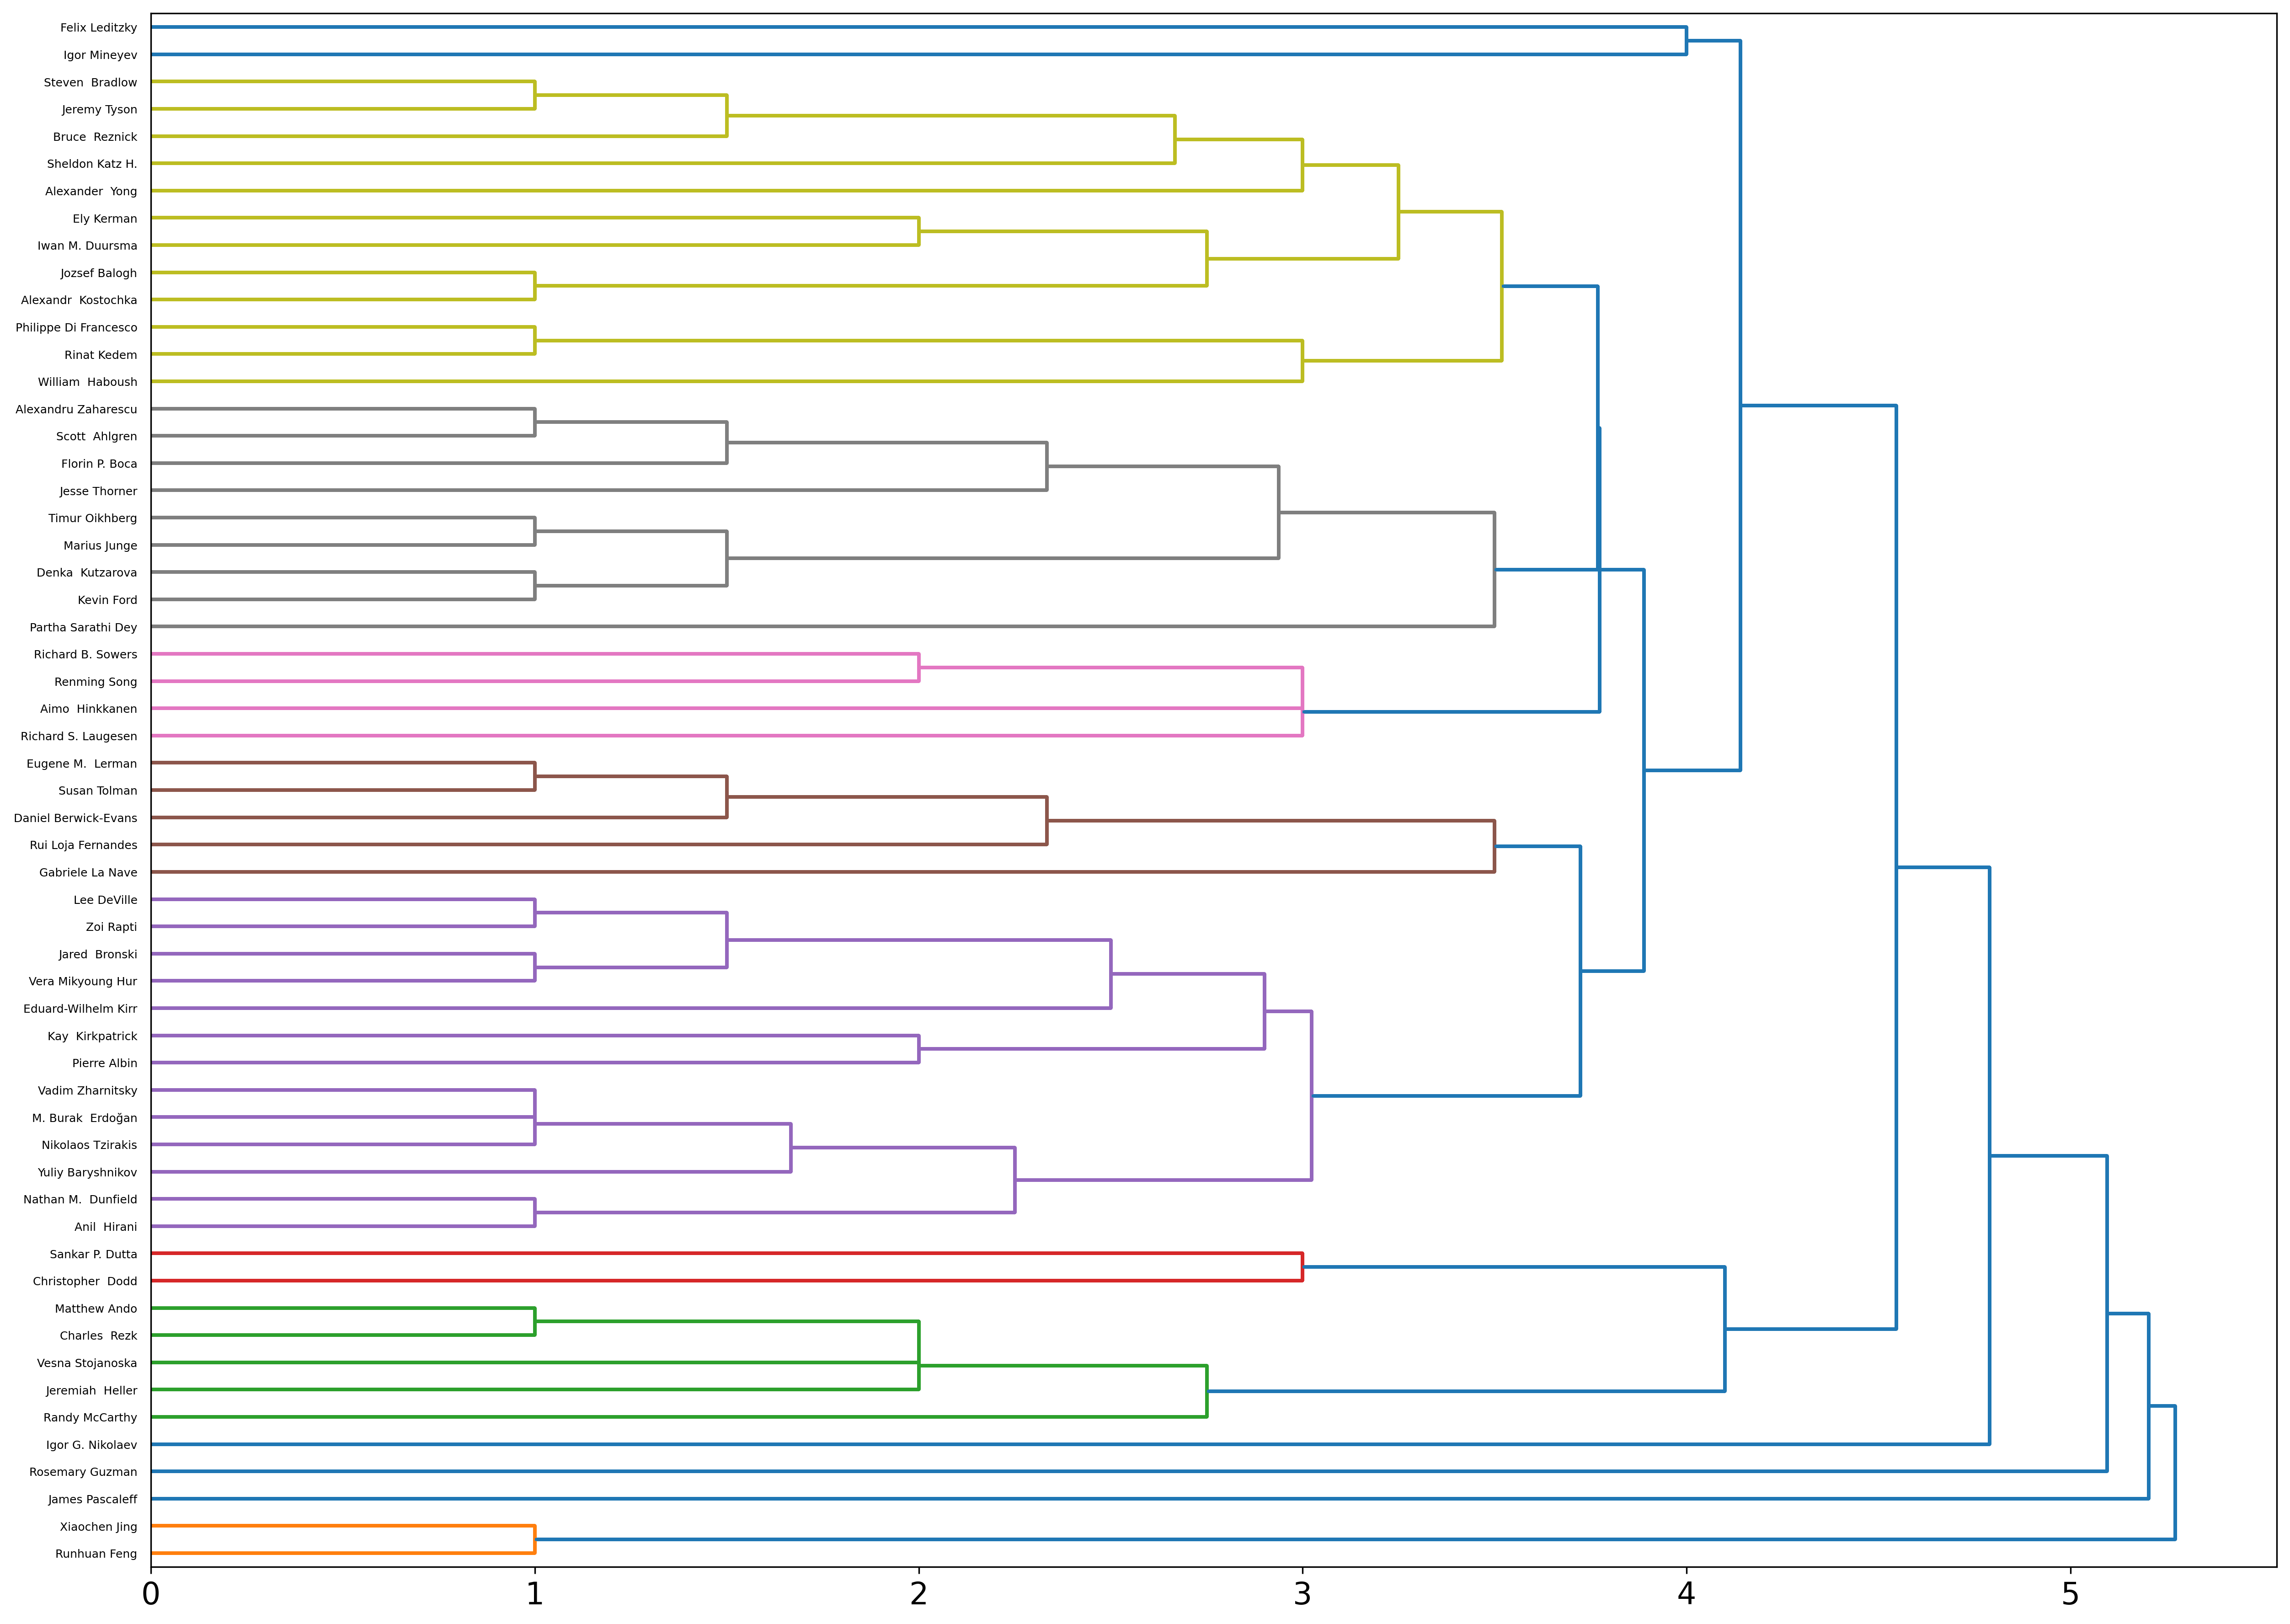

In [44]:
# Average
cl = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='precomputed',
                             compute_full_tree=True, linkage='average', compute_distances=True)
cl.fit(distance_mat)
n_samples = len(cl.labels_)
counts = np.zeros(cl.children_.shape[0])
plt.figure(figsize=(20, 15), dpi=300)
for i, merge in enumerate(cl.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

    linkage_matrix = np.column_stack(
        [cl.children_, cl.distances_, counts]
    ).astype(float)
    dendrogram(linkage_matrix, **kwarg)


## Clustering with # of joint publication

In [79]:
with open("joint_publication.json") as file:
    joint_pub = ujson.load(file)

In [92]:
# Construct similarity matrix and distance matrix
num_ppl = len(faculties)
similarity_joint = np.zeros((num_ppl, num_ppl))
i = 0
j = 1
for key, val in joint_pub.items():
    similarity_joint[i, j] = val
    j += 1
    if j == num_ppl:
        i += 1
        j = i + 1
        pass
    pass

similarity_joint += similarity_joint.T
distance_joint = 1 / np.power(1.5, similarity_joint)
np.fill_diagonal(distance_joint, 0)

In [93]:
distance_joint[18, 35]

0.6666666666666666

### Dendrogram of different linkages (using joint publication number)

In [81]:
truncate_level = -1        # Draw dendrogram with at most "truncate_level" levels. (-1 to show the complete dendrogram)
kwarg = {"truncate_mode": "level", "p": truncate_level, "orientation": "right", "labels": faculties}

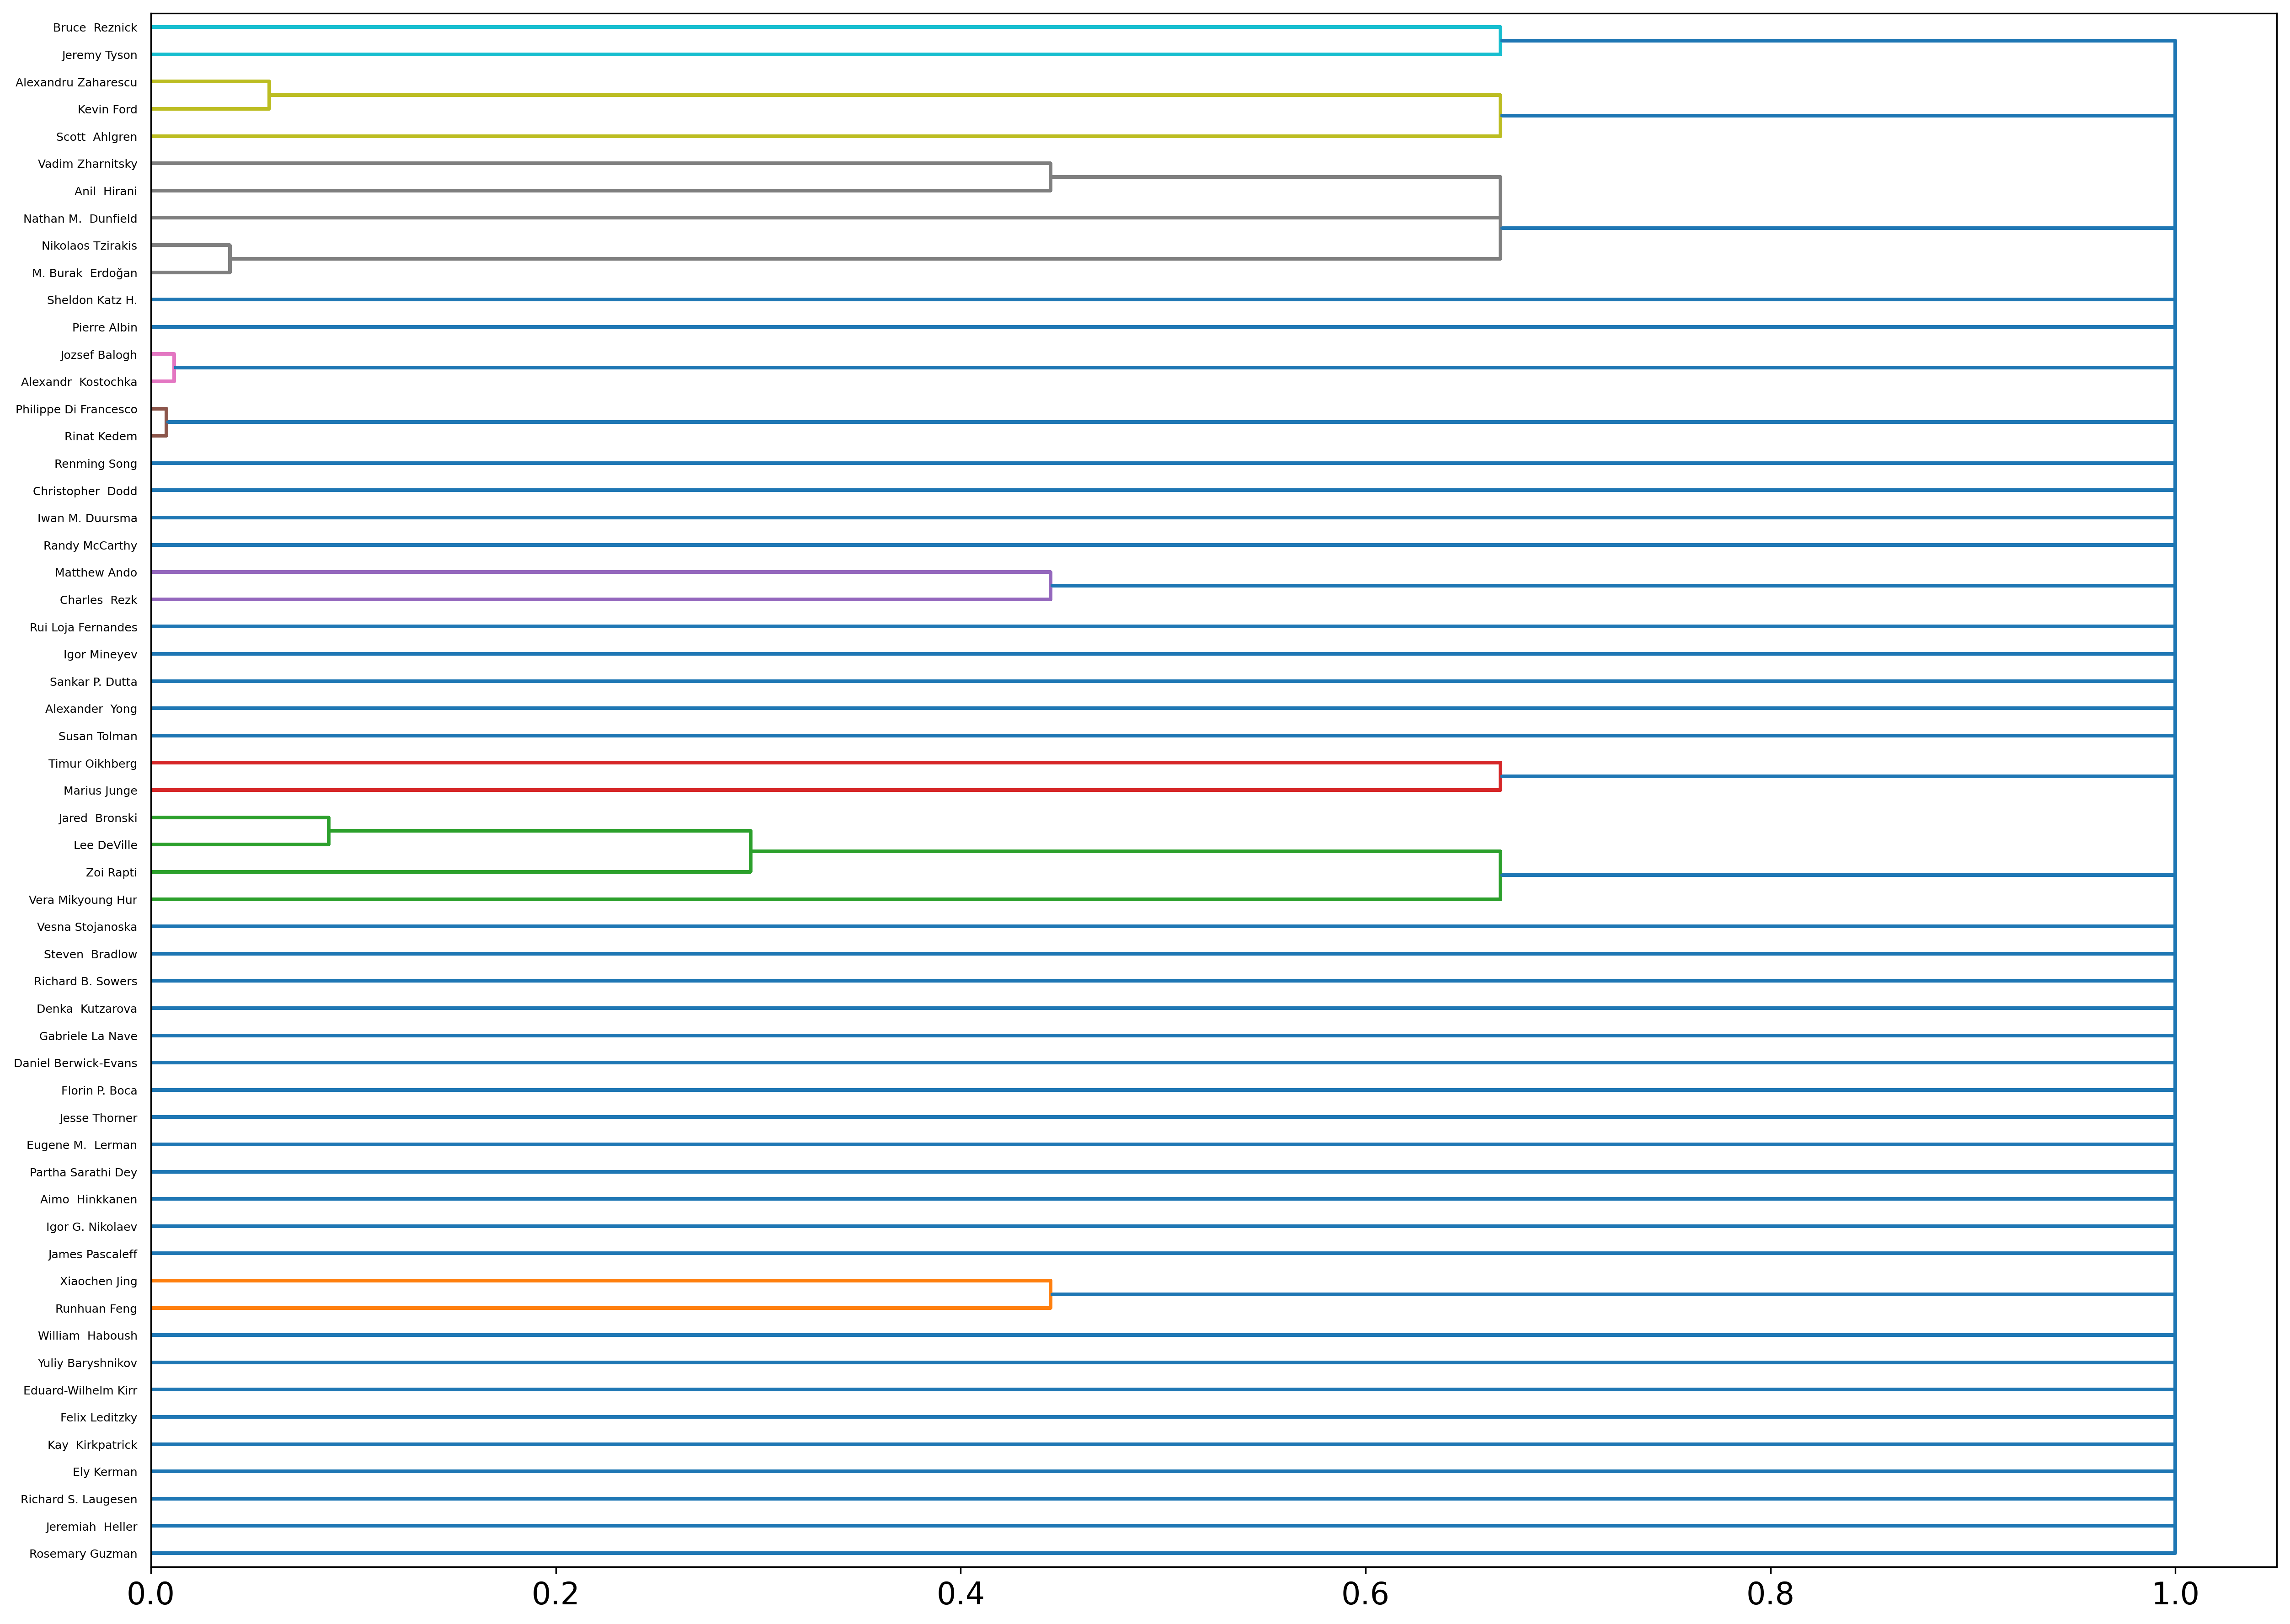

In [96]:
# Single
cl = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='precomputed',
                             compute_full_tree=True, linkage='single', compute_distances=True)
cl.fit(distance_joint)
n_samples = len(cl.labels_)
counts = np.zeros(cl.children_.shape[0])
plt.figure(figsize=(20, 15), dpi=300)
for i, merge in enumerate(cl.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

    linkage_matrix = np.column_stack(
        [cl.children_, cl.distances_, counts]
    ).astype(float)
    dendrogram(linkage_matrix, **kwarg)
    pass


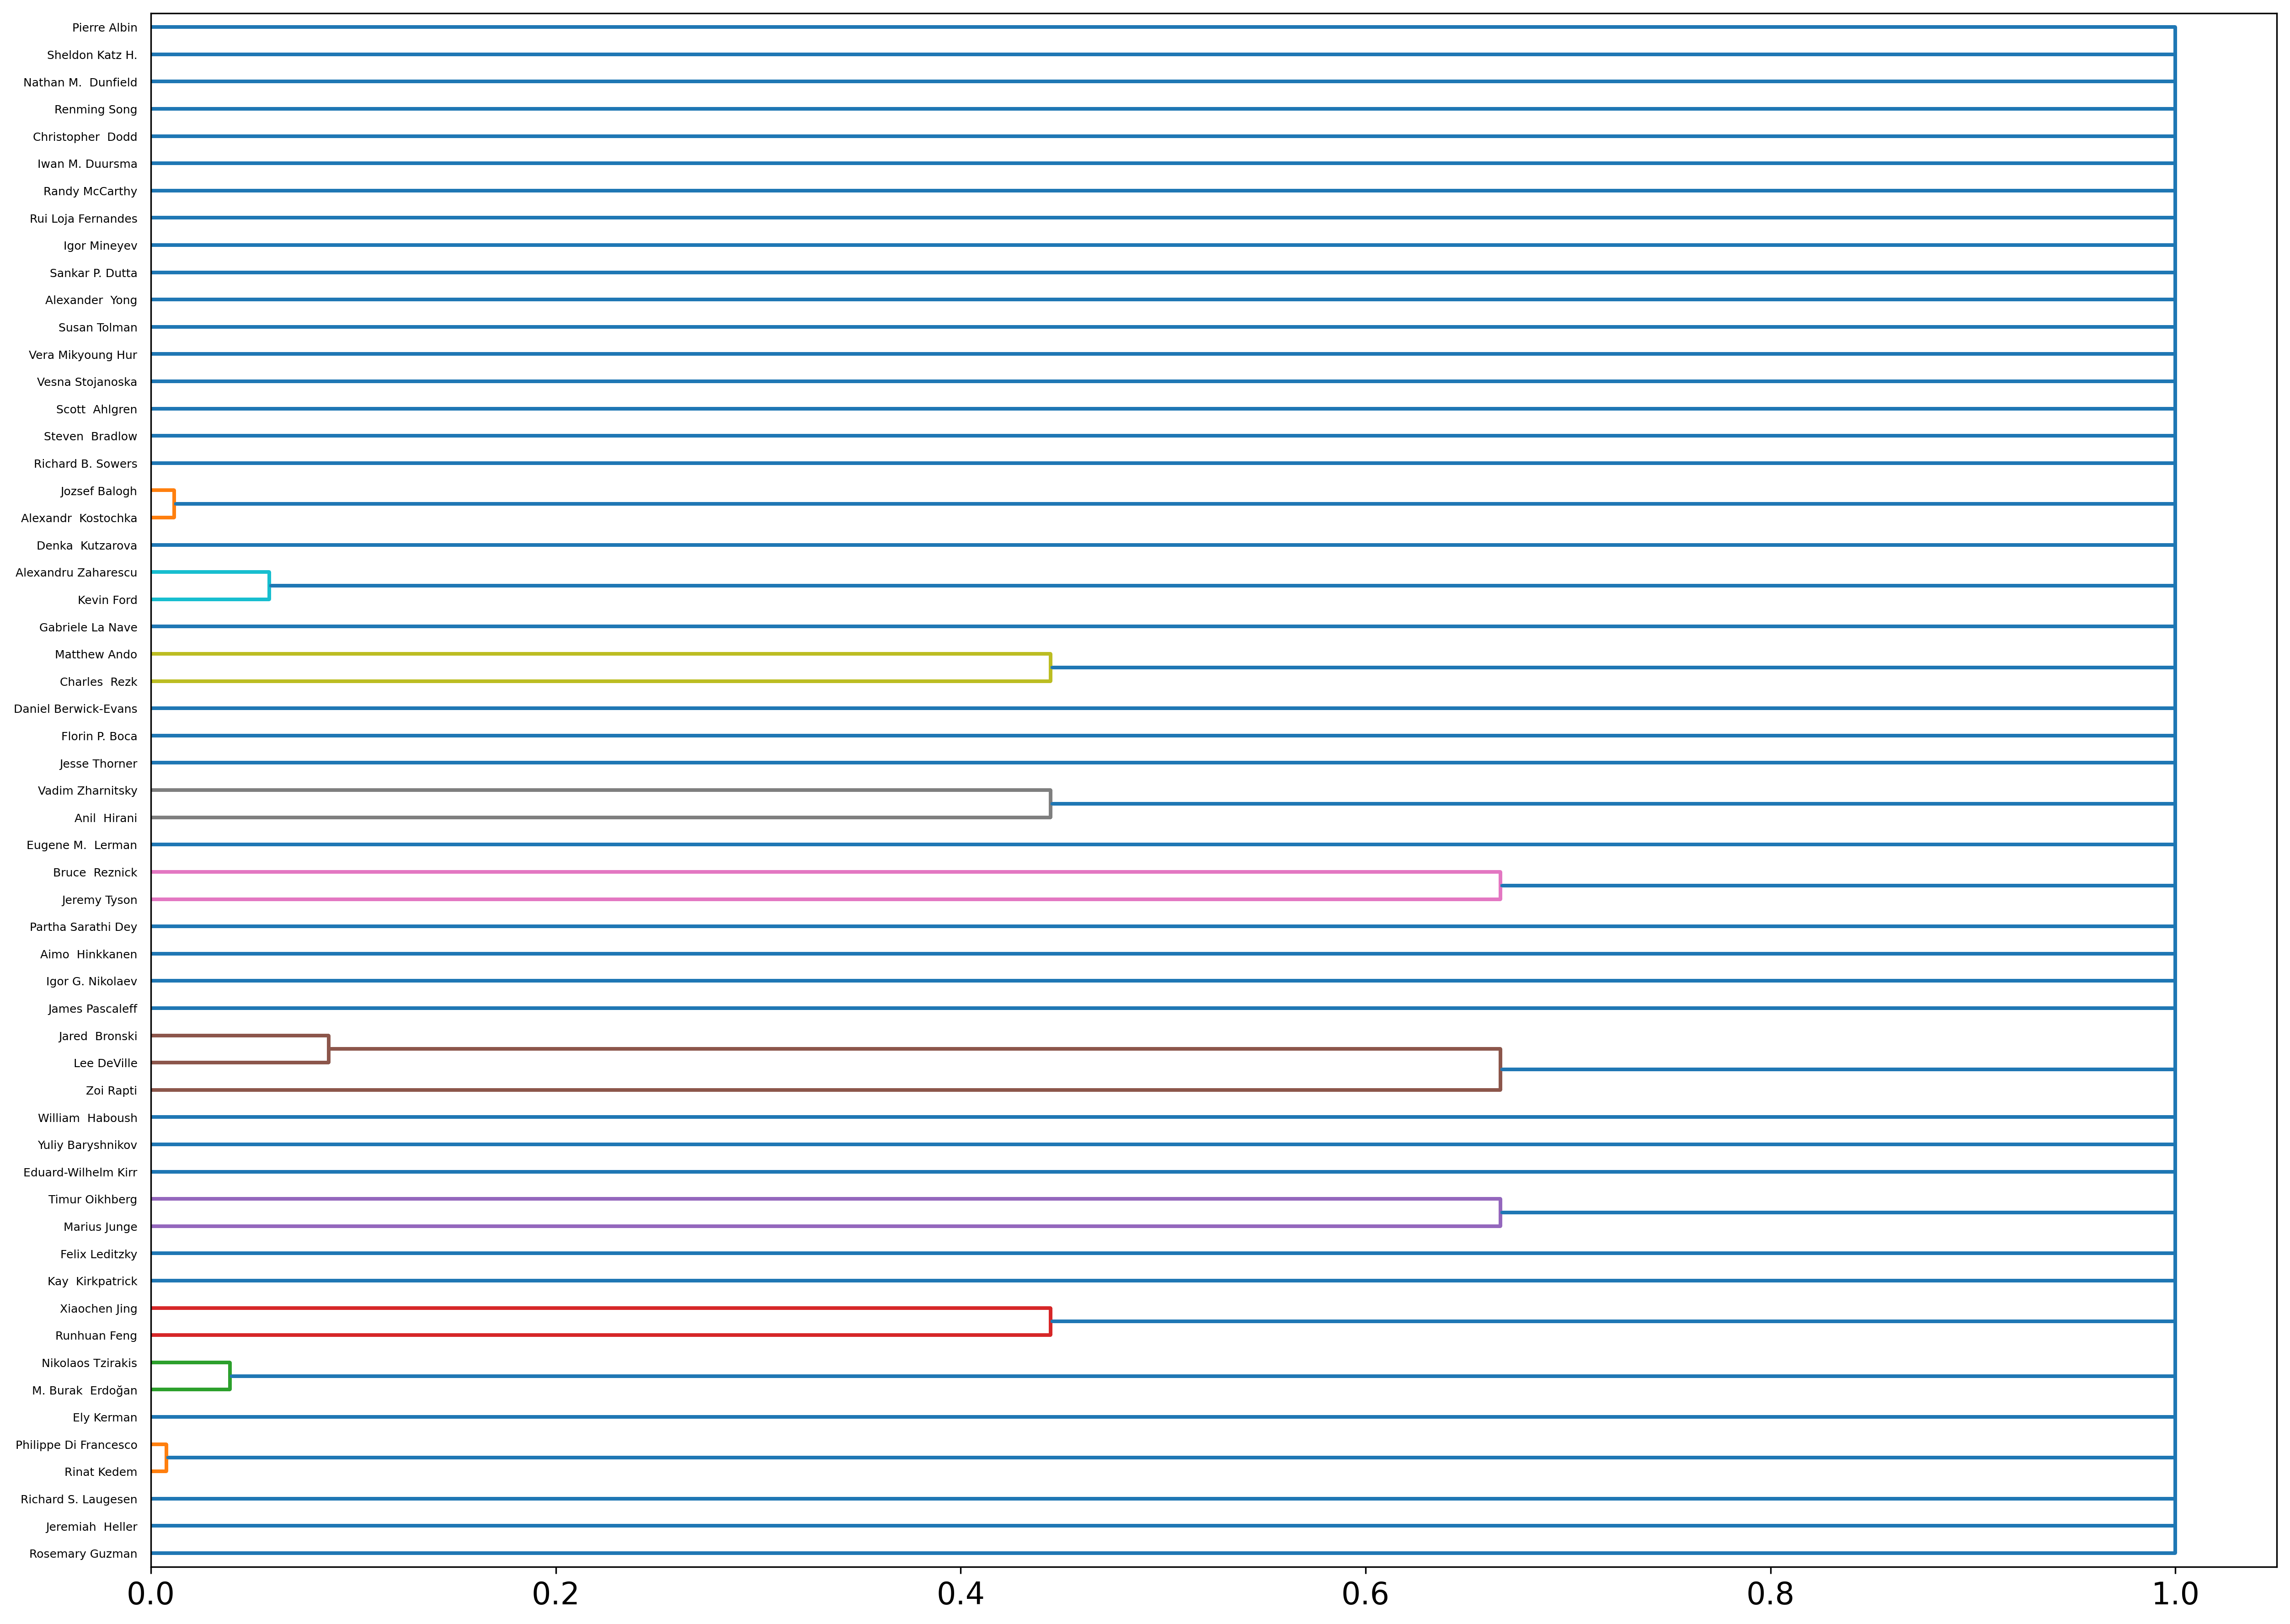

In [97]:
# Complete
cl = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='precomputed',
                             compute_full_tree=True, linkage='complete', compute_distances=True)
cl.fit(distance_joint)
n_samples = len(cl.labels_)
counts = np.zeros(cl.children_.shape[0])
plt.figure(figsize=(20, 15), dpi=300)
for i, merge in enumerate(cl.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

    linkage_matrix = np.column_stack(
        [cl.children_, cl.distances_, counts]
    ).astype(float)
    dendrogram(linkage_matrix, **kwarg)
    pass


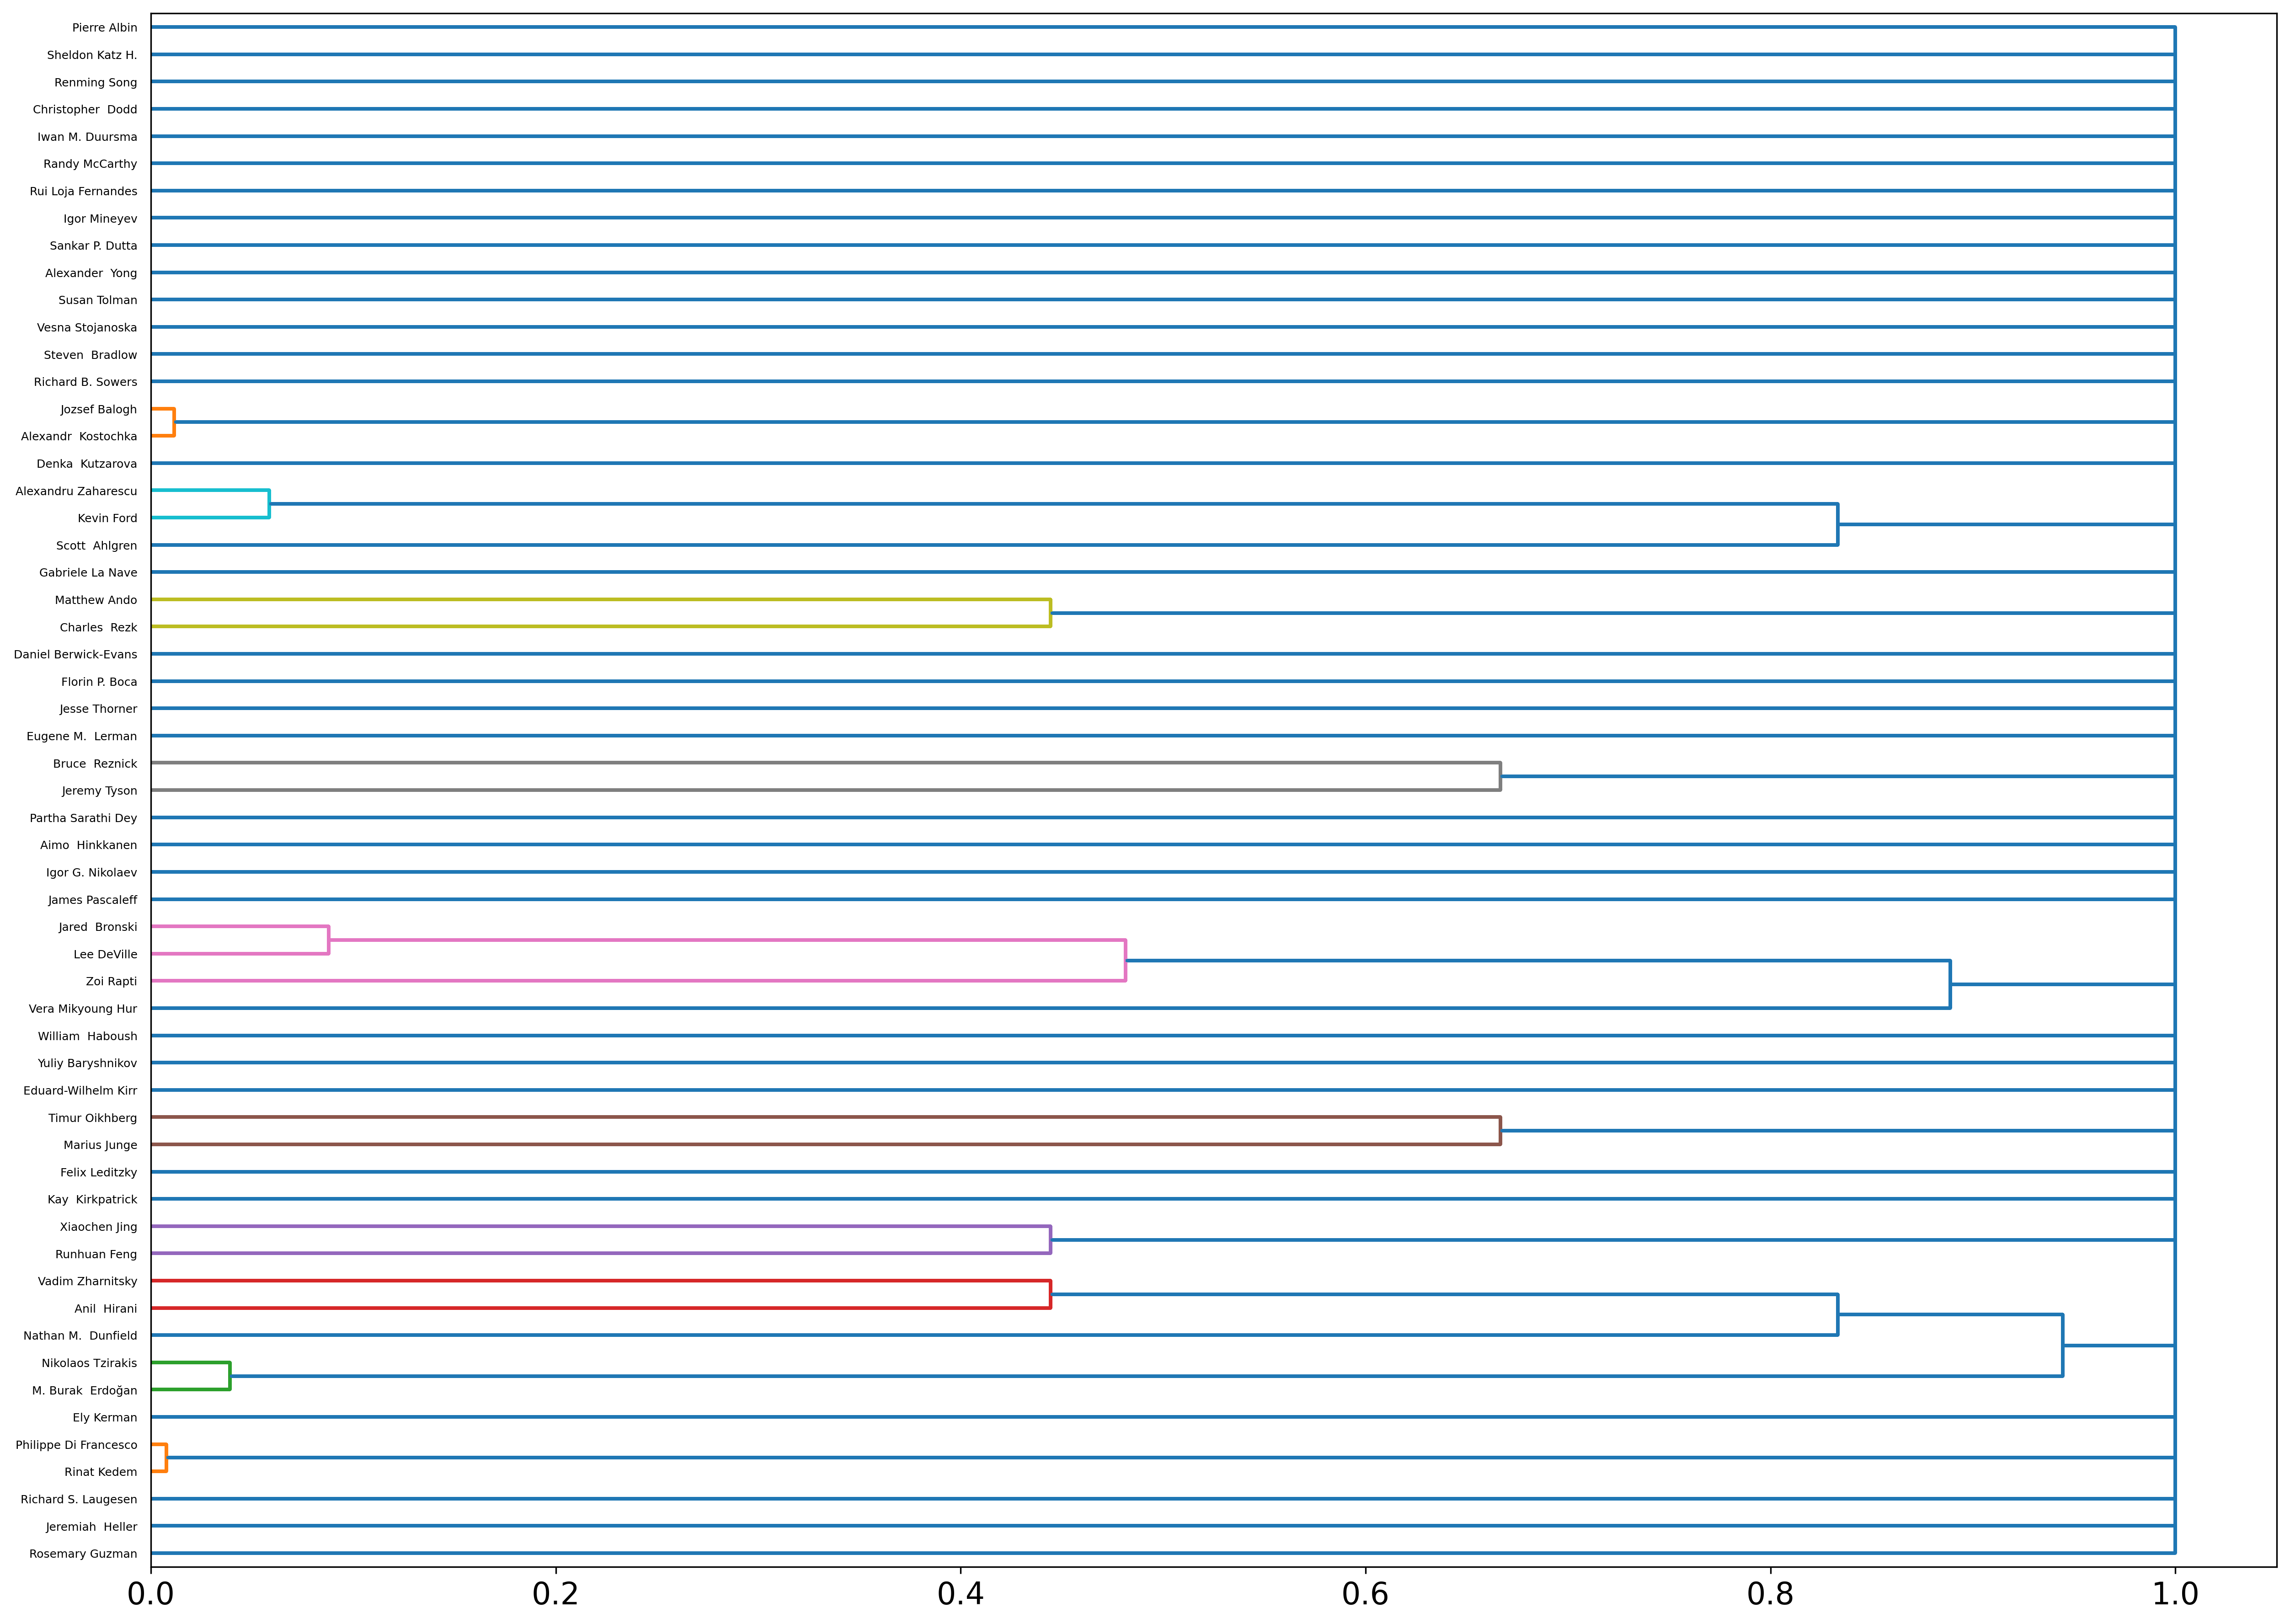

In [98]:
# Average
cl = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='precomputed',
                             compute_full_tree=True, linkage='average', compute_distances=True)
cl.fit(distance_joint)
n_samples = len(cl.labels_)
counts = np.zeros(cl.children_.shape[0])
plt.figure(figsize=(20, 15), dpi=300)
for i, merge in enumerate(cl.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

    linkage_matrix = np.column_stack(
        [cl.children_, cl.distances_, counts]
    ).astype(float)
    dendrogram(linkage_matrix, **kwarg)


# ------------------- Random stuff------------------

In [187]:
ncluster = 10

single = AgglomerativeClustering(n_clusters=ncluster, linkage="single", affinity="precomputed")
labels_single = single.fit(distance_mat).labels_

complete = AgglomerativeClustering(n_clusters=ncluster, linkage="complete", affinity="precomputed")
labels_complete = complete.fit(distance_mat).labels_

average = AgglomerativeClustering(n_clusters=ncluster, linkage="average", affinity="precomputed")
labels_average = average.fit(distance_mat).labels_

# labels_single = dict(zip(faculties, labels_single))
# labels_complete = dict(zip(faculties, labels_complete))
# labels_average = dict(zip(faculties, labels_average))

In [182]:
labels_complete

array([0, 0, 2, 4, 7, 2, 0, 3, 0, 7, 0, 1, 1, 3, 7, 4, 7, 3, 2, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 7, 1, 3, 0, 0, 0, 2, 3, 0, 0, 0, 0, 1, 0, 6,
       4, 0, 0, 0, 0, 7, 6, 2, 3, 3, 4, 1, 5])

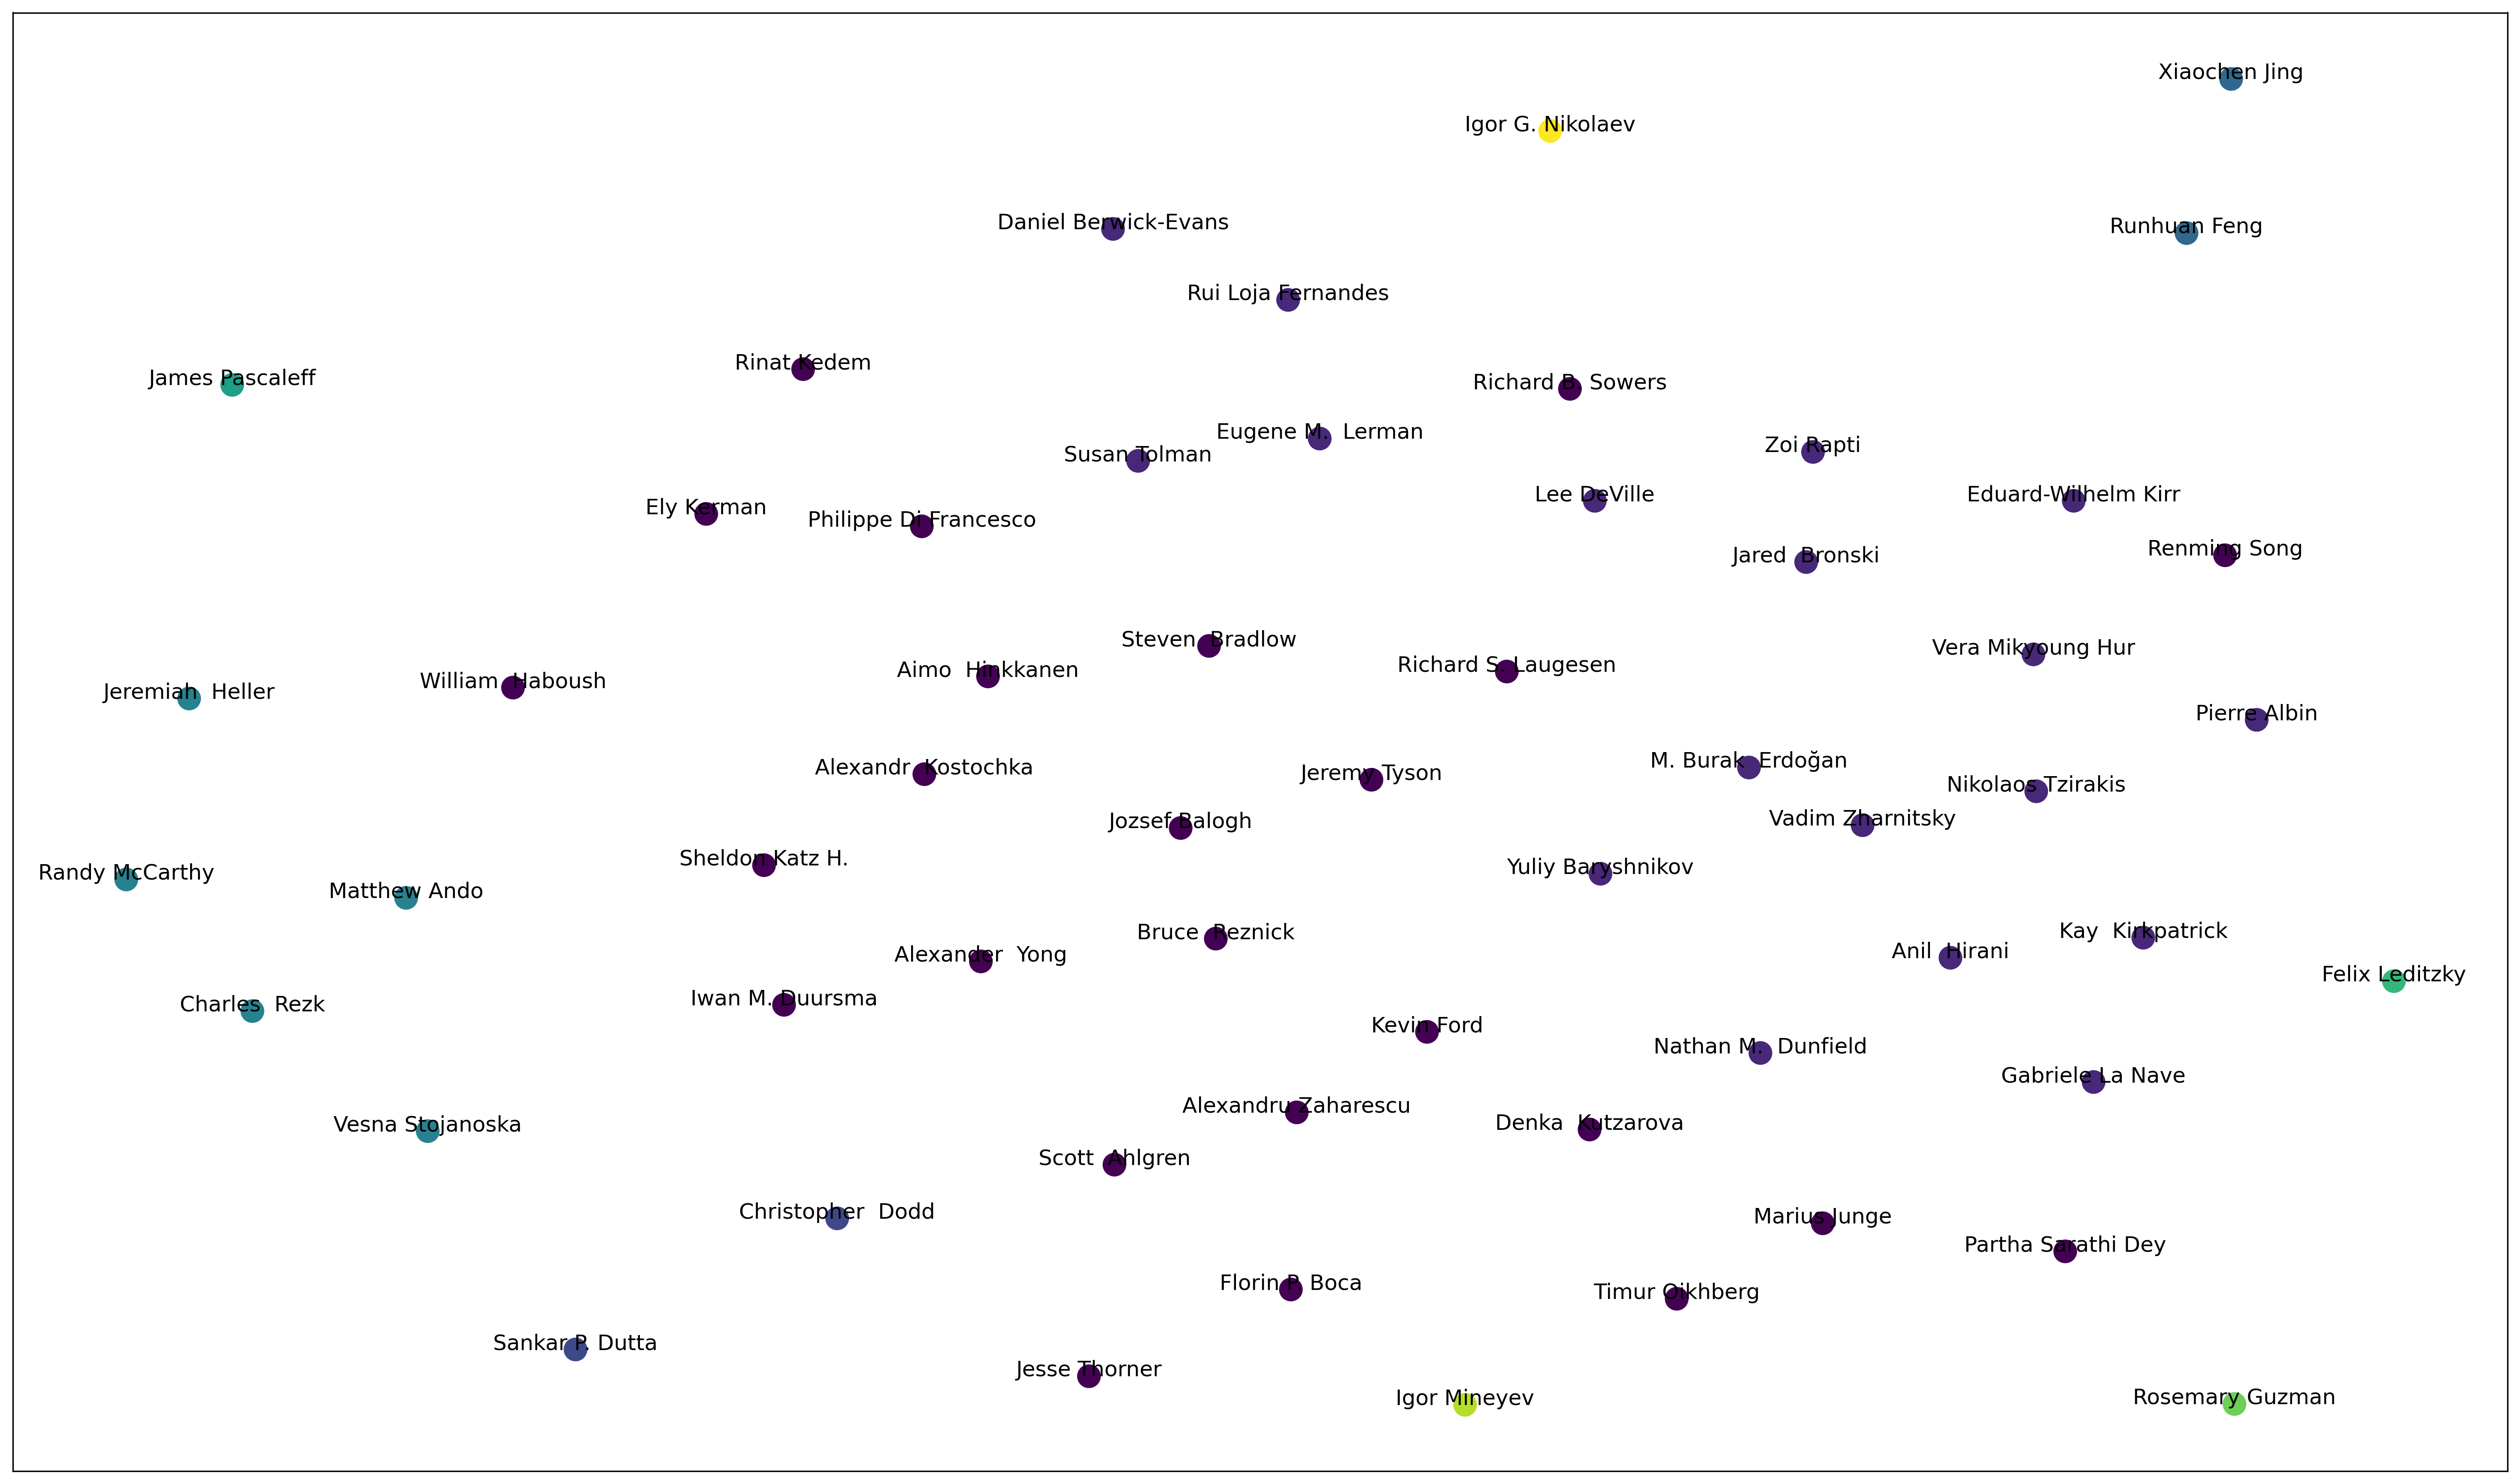

In [209]:
similarity_mat = distance_mat.copy()
np.fill_diagonal(similarity_mat, 1)
similarity_mat = 1/similarity_mat
np.fill_diagonal(similarity_mat, 0)

G = nx.from_numpy_array(similarity_mat ** 3)
nx.set_node_attributes(G, {i: faculties[i] for i in range(len(faculties))}, "name")
plt.figure(figsize=(25,15), dpi=300)
pos = nx.spring_layout(G, weight = "weight")
nx.draw_networkx_nodes(G, pos=pos, node_size=150, node_color=labels_average)
nx.draw_networkx_labels(G, pos=pos,
                        labels={i: faculties[i] for i in range(len(faculties))},
                        font_size=12, verticalalignment="baseline")
plt.savefig("graph.jpg")
plt.show()


In [142]:
np.fill_diagonal(distance_mat, 1)
distance_mat

array([[1., 3., 4., ..., 3., 4., 5.],
       [3., 1., 4., ..., 3., 5., 5.],
       [4., 4., 1., ..., 4., 6., 4.],
       ...,
       [3., 3., 4., ..., 1., 5., 6.],
       [4., 5., 6., ..., 5., 1., 5.],
       [5., 5., 4., ..., 6., 5., 1.]])

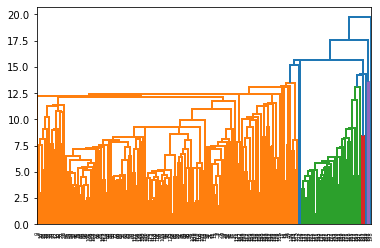

In [5]:
# Single
cl = AgglomerativeClustering(distance_threshold=None, n_clusters=5, affinity='euclidean',
                             compute_full_tree=False, linkage='single', compute_distances=True)
cl.fit(features)
n_samples = len(cl.labels_)
counts = np.zeros(cl.children_.shape[0])
for i, merge in enumerate(cl.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

    linkage_matrix = np.column_stack(
        [cl.children_, cl.distances_, counts]
    ).astype(float)
    dendrogram(linkage_matrix)

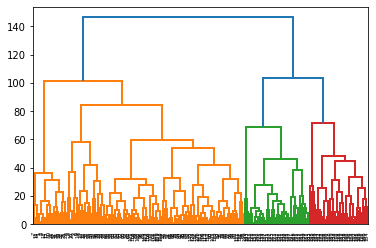

In [39]:
# Complete
cl = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean',
                             compute_full_tree=True, linkage='complete')
cl.fit(features)
n_samples = len(cl.labels_)
counts = np.zeros(cl.children_.shape[0])
for i, merge in enumerate(cl.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

    linkage_matrix = np.column_stack(
        [cl.children_, cl.distances_, counts]
    ).astype(float)
    dendrogram(linkage_matrix)

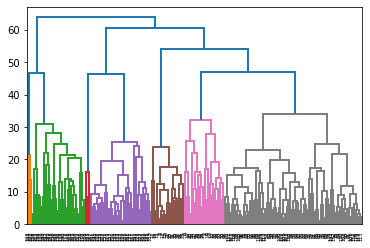

In [40]:
# average
cl = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean',
                             compute_full_tree=True, linkage='average')
cl.fit(features)
n_samples = len(cl.labels_)
counts = np.zeros(cl.children_.shape[0])
for i, merge in enumerate(cl.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

    linkage_matrix = np.column_stack(
        [cl.children_, cl.distances_, counts]
    ).astype(float)
    dendrogram(linkage_matrix)

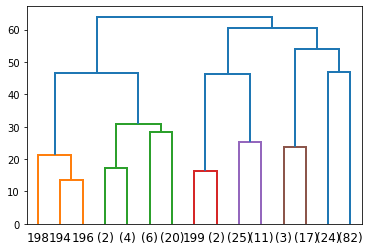

In [9]:
# ward
cl = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean',
                             compute_full_tree=True, linkage='average')
cl.fit(features)
n_samples = len(cl.labels_)
counts = np.zeros(cl.children_.shape[0])
for i, merge in enumerate(cl.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

    linkage_matrix = np.column_stack(
        [cl.children_, cl.distances_, counts]
    ).astype(float)
    dendrogram(linkage_matrix, truncate_mode="level", p=3)